# UFO

## Import

In [1]:
import sys
sys.path.append('/Users/efraflores/Desktop/hub/diplo/venv/lib/python3.9/site-packages')

In [2]:
import os

BASE_DIR = '/Users/efraflores/Desktop/EF/Diplo/data/05'
FILE_NAME = '0502_ufo_data.csv'
print(os.listdir(BASE_DIR))

['0501_cred.json', '.DS_Store', '0501_untitled.csv', 'ufo_sentim.csv', '0502_ufo_data.csv']


In [3]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

df = pd.read_csv(os.path.join(BASE_DIR,FILE_NAME),error_bad_lines=False,low_memory=False)
print(df.info())
df.sample()

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   occurance    88679 non-null  object 
 1   city         88679 non-null  object 
 2   citystate    81270 non-null  object 
 3   country      76314 non-null  object 
 4   ufoshape     85757 non-null  object 
 5   dseconds     88677 non-null  object 
 6   duration     85660 non-null  object 
 7   description  88644 non-null  object 
 8   report_date  88679 non-null  object 
 9   lat          88679 non-null  object 
 10  long         88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB
None


,occurance,city,citystate,country,ufoshape,dseconds,duration,description,report_date,lat,long
51509,6/10/2001 00:20,redlands,ca,us,circle,120,two minutes,orange ball drops tiny orange lights,8/5/2001,34.0555556,-117.1817


## Functions

In [4]:
import time
import numpy as np
from IPython.lib.display import Audio

start = time.time()
def time_exp(x):
    #Just print how many minutes and seconds have passed
    minutes, seconds = np.floor(x/60), 60*(x/60-np.floor(x/60))
    print(f"{'{:.0f}'.format(minutes)} minutos con {'{:.2f}'.format(seconds)} segundos")
    
def tone(a=1000, b=700, play_time_seconds=1, framerate=4410):
    #Make a sound! Useful while training models
    t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)*np.pi
    return Audio(np.sin(a*t)+np.sin(b*t), rate=framerate, autoplay=True)

Omit outliers with the IQR method

<https://online.stat.psu.edu/stat200/lesson/3/3.2>

In [5]:
def iqr(data,x,p=0.3):
    dim_before = len(data)
    var = data[x]
    q1 = var.quantile(p/2)
    q3 = var.quantile(1-p/2)
    iqr = q3 - q1
    data = data[(var.isnull()) | ((var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr))]
    print(f'There are {"{:.1%}".format(len(data)/dim_before)}% of the previous rows')
    return data

In [6]:
#Uncomment the following lines if it's the first time you run this packages
'''
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
'''
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

def clean_text(text,
               language='english',pattern="[^a-zA-Z' ]",
               lower=False,lemma=False,rem_stopw=False,unique=False,
               add_stopw=[]):
    #It clean and can remove stopwords or even lemmatize words if specified in params
    cleaned_text = unicodedata.normalize('NFD',str(text).replace('\n','')).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern,' ',cleaned_text.decode('utf-8'),flags=re.UNICODE)
    cleaned_text = [(lem.lemmatize(word,pos='v') if lemma else word) for word in 
                    (cleaned_text.lower().split() if lower else cleaned_text.split())]
    if rem_stopw: cleaned_text = [word for word in cleaned_text if word.lower() not in 
                                  stopwords.words(language)+add_stopw]
    return ' '.join((set(cleaned_text) if unique else cleaned_text))

#Ex
ex = "I am going to run!!! I ran while I was running??? ..."
print('\nOriginal:\t\t',ex)
print('Basic cleaning:\t\t',clean_text(ex))
print('Changing the pattern:\t',clean_text(ex,pattern="[^a-zA-Z!\.]"))
print('Without stopwords:\t',clean_text(ex,rem_stopw=True))
print('Lower and lemma:\t',clean_text(ex,lower=True,lemma=True))
print('Super cleaning:\t\t',clean_text(ex,add_stopw=['go'],lower=True,rem_stopw=True,lemma=True,unique=True))
print("\nIt actually corrects the weird accents, example\n\tFROM:\t ThÈ ÉfrâïsMã's?...\n\tTO:\t",clean_text("ThÈ ÉfrâïsMa's?...",lower=True))


Original:		 I am going to run!!! I ran while I was running??? ...
Basic cleaning:		 I am going to run I ran while I was running
Changing the pattern:	 I am going to run!!! I ran while I was running ...
Without stopwords:	 going run ran running
Lower and lemma:	 i be go to run i run while i be run
Super cleaning:		 run

It actually corrects the weird accents, example
	FROM:	 ThÈ ÉfrâïsMã's?...
	TO:	 the efraisma's


In [7]:
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(text):
    sid = SentimentIntensityAnalyzer()
    try: list(map(sid.polarity_scores,sent_tokenize(text)))[0]
    except: sentences = sent_tokenize('a')
    else: sentences = sent_tokenize(text)
    res = map(sid.polarity_scores, sentences)
    return list(res)[0]

print(sentiment('I love it'))
print(sentiment('I hate it'))
print(sentiment('It is ok'))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}


In [8]:
from sklearn.ensemble import IsolationForest

def outliers(data,cols,p=0.04):
    df = data.copy()
    dim_before = len(df)
    outlier = IsolationForest(contamination=p,n_jobs=-1)
    df['outlier'] = outlier.fit_predict(df[cols])
    df = df[df['outlier']!=-1].drop(columns = 'outlier')
    print(f'There are {"{:.1%}".format(len(df)/dim_before)}% of the previous rows')
    return df

In [9]:
def multishift(data,id_cols,date_cols,shifts,**pivot_args):
    df = data.copy()
    #Merge all column names as a string
    id_col = ','.join(id_cols)
    #And as a column
    df[id_col] = df[id_cols].apply(lambda x:','.join(x.dropna().astype(str)),axis=1)
    #Drop any "id_col"-set that has a lower frequency than the max of the "shifts-list"
    freq = df[id_col].value_counts().to_frame()
    omit_idx = freq[freq[id_col]<=max(shifts)].index.to_list()
    if len(omit_idx)>0:
        df = df[~df[id_col].isin(omit_idx)].copy()
    #Change data structure to build the "shifting"
    df = df.pivot_table(index=[id_col]+date_cols,
                        **pivot_args,
                        fill_value=0)
    #Concatenate multiple columns if they are
    df.columns = ['_'.join([x for x in col]) if 
                  not isinstance(df.columns[0],str) #First element is not a string
                  else col for col in df.columns]
    #Bring the id_col for taking the set (unique values) in the next loop
    df.reset_index(inplace=True)
    #Each shift must be calculated at "id_col" level
    total = pd.DataFrame()
    for row in set(df[id_col]):
        #Set the id_col as index (again) to call all the rows with that id_col
        df_id = df.set_index(id_col).loc[row,:]
        cols = df_id.columns[1:]
        #Start the "shifting"
        aux = df_id.copy()
        for i in shifts:
            aux = aux.join(df_id.iloc[:,1:].shift(i).rename(columns={x:f'{x}_{str(i).zfill(2)}' 
                                                                     for x in cols}))
        aux[id_col] = row
        total = total.append(aux,ignore_index=True)
    return total.set_index(id_cols+[date_cols])

## Transform

### Occurance

In [154]:
#Errors because %H just accepts 0-23
n=0
for i,hr in enumerate(df['occurance']):
    try:
        pd.to_datetime(hr,format='%m/%d/%Y %H:%M')
    except:
        print(i,hr)
        n += 1
        if n>4: break

166 10/10/2005 24:00
316 10/11/1994 24:00
417 10/11/2006 24:00
487 10/11/2012 24:00
567 10/1/1972 24:00


In [155]:
import re
import datetime

aux = []
correct_hr = []
for x in df['occurance']:
    try:
        hr = pd.to_datetime(x)
        aux.append(0)
    except:
        hr = pd.to_datetime(re.sub('\s24',' 00',str(x)))
        aux.append(1)
    finally:
        correct_hr.append(hr)
        
print(df.iloc[166,0])
print((pd.Series(correct_hr) + pd.Series([datetime.timedelta(x) for x in aux]))[166])
df['occurance'] = pd.Series(correct_hr) + pd.Series([datetime.timedelta(x) for x in aux])

10/10/2005 24:00
2005-10-11 00:00:00


<AxesSubplot:>

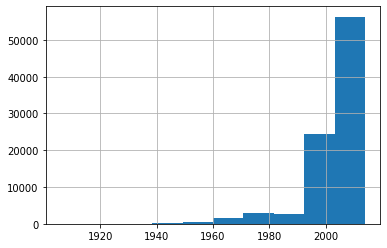

In [156]:
df['occurance'].dt.year.hist()

There are 95.6%% of the previous rows


<AxesSubplot:>

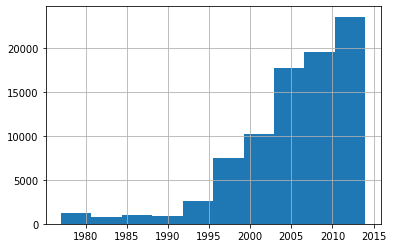

In [157]:
df['year'] = df['occurance'].dt.year
df = iqr(df,'year')
df['year'].hist()

In [158]:
df['hr_range'] = [str(x.left).zfill(2)+"-"+str(x.right).zfill(2) for x in 
              pd.cut(df['occurance'].dt.hour,bins=[0,10,19,21,23,24],right=False)]
df['hr_range'].value_counts(1)

21-23   0.2730
00-10   0.2490
10-19   0.1973
19-21   0.1803
23-24   0.1004
Name: hr_range, dtype: float64

### Shape

In [159]:
df.drop(columns=['city','citystate','country'],inplace=True)

In [160]:
df['ufoshape'] = ['light' if x in ['light','fireball','flash','flare'] else 'other' for x in df['ufoshape']]
df['ufoshape'].value_counts(1)

other   0.7013
light   0.2987
Name: ufoshape, dtype: float64

### Duration

In [161]:
df['dseconds'] = df['dseconds'].astype(str).apply(lambda x: re.sub('[^\d]','',x)
                                                 ).replace('',np.nan).astype(float)
df['dseconds'].describe([i/10 for i in range(10)])

count      84794.0000
mean        8115.9260
std       597554.5475
min            0.0000
0%             0.0000
10%            2.0000
20%           10.0000
30%           30.0000
40%           60.0000
50%          120.0000
60%          300.0000
70%          360.0000
80%          900.0000
90%         1800.0000
max     97836000.0000
Name: dseconds, dtype: float64

There are 93.8%% of the previous rows


<AxesSubplot:>

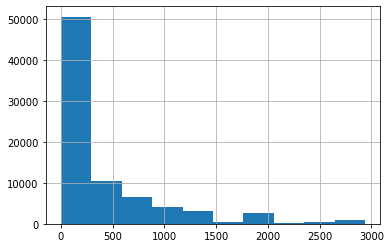

In [162]:
import matplotlib.pyplot as plt
df = iqr(df,'dseconds')
df['dseconds'].hist()

In [163]:
aux = []
for x in df['dseconds']:
    if x in [0.0,np.nan]: aux.append('unkown')
    elif x < 60: aux.append('less_hr')
    else: aux.append('more_hr')
df['duration'] = aux
df['duration'].value_counts(1)

more_hr   0.6224
less_hr   0.2930
unkown    0.0846
Name: duration, dtype: float64

### Report date

In [164]:
df['report_date'] = pd.to_datetime(df['report_date'])
df['report_date'] = ((df['report_date']-df['occurance'])/np.timedelta64(1,'D')).astype(int)
df = df[df['report_date']>=0].copy()
df['report_date'].describe([i/10 for i in range(10)])

count   79495.0000
mean      622.2764
std      1795.6223
min         0.0000
0%          0.0000
10%         3.0000
20%         6.0000
30%        10.0000
40%        16.0000
50%        24.0000
60%        36.0000
70%        59.0000
80%       225.0000
90%      1670.0000
max     13469.0000
Name: report_date, dtype: float64

In [165]:
df['report_date'] = [str(int(x.left)).zfill(2)+"-"+str(int(x.right)).zfill(2) for x in 
                     pd.cut(df['report_date'],bins=[0,7,30,60,1000,15e3],right=False)]
df['report_date'].value_counts(1)

07-30        0.3399
00-07        0.2082
60-1000      0.1638
30-60        0.1539
1000-15000   0.1341
Name: report_date, dtype: float64

In [166]:
df['occurance'] = df['occurance'].dt.month.astype(str).str.zfill(2)
df['occurance'].value_counts(1)

07   0.1151
08   0.1051
06   0.0945
09   0.0943
10   0.0921
11   0.0855
01   0.0737
12   0.0728
04   0.0701
03   0.0695
05   0.0672
02   0.0602
Name: occurance, dtype: float64

### Location

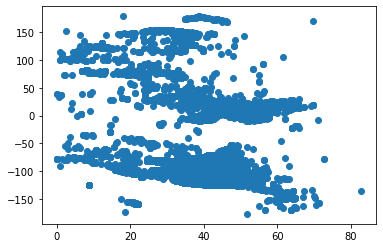

In [167]:
import matplotlib.pyplot as plt

df['lat'] = df['lat'].apply(lambda x:re.sub('[^\d\.]','',str(x))).astype(float)
df = df[df['lat']!=0].copy()
#df = outliers(df,['lat','long'],p=0.02)
plt.scatter(df['lat'],df['long'])

In [168]:
'''!pip install seaborn'''
import seaborn as sns
color = sns.dark_palette("#69d",as_cmap=True)

for geo in ['lat','long']:
    df[f'{geo}_cut'] = pd.qcut(df[f'{geo}'],q=4).astype(str).str.replace(',',' to ')
    
df.pivot_table(index='lat_cut',columns='long_cut',values='duration',aggfunc='count'
              ).style.background_gradient(cmap=color).format('{:.0f}')

long_cut,"(-112.185, -87.884]","(-176.659, -112.185]","(-78.738, 178.442]","(-87.884, -78.738]"
lat_cut,,,,
"(0.0226, 34.174]",6603,4805,1779,6390
"(34.174, 39.444]",5446,5950,3192,4991
"(39.444, 42.865]",4280,971,8246,6082
"(42.865, 82.863]",3240,7859,6357,2116


### Description

In [170]:
df['clean'] = df['description'].apply(lambda x: clean_text(x,lower=True))
df['min_text'] = df['description'].apply(lambda x: clean_text(x,lower=True,lemma=True,
                                                              rem_stopw=True,unique=True))
df['length'] = df['clean'].apply(len)
df['relevance'] = df['min_text'].apply(len) / (df['length']+1e-10)

<AxesSubplot:>

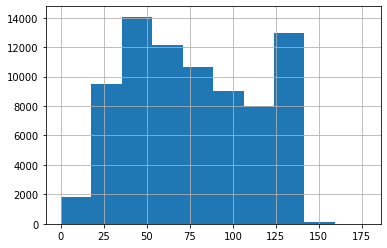

In [172]:
df['length'].hist()

<AxesSubplot:>

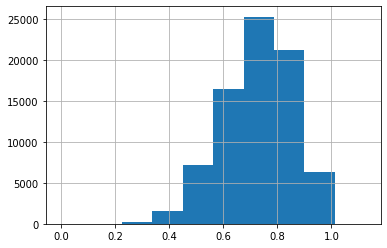

In [173]:
df['relevance'].hist()

<AxesSubplot:>

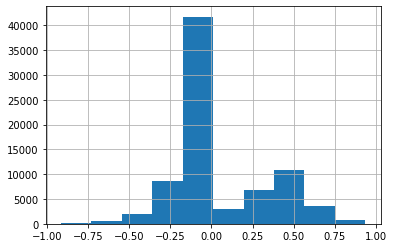

In [175]:
df = df.join(pd.DataFrame(list(map(sentiment,df['clean'])),index=df.index))
display(df['compound'].hist())

aux = []
for x in df['compound']:
    if x>0:aux.append('pos')
    elif x<0:aux.append('neg')
    else:aux.append('neu')

df['compound_cut'] = aux
df['compound_cut'].value_counts(1)

In [223]:
df['compound_cut'].value_counts(1)

neu   0.5142
pos   0.3220
neg   0.1638
Name: compound_cut, dtype: float64

In [215]:
#BACKUP because last cells runs in ~12min
#df.to_csv(os.path.join(BASE_DIR,'ufo_sentim.csv'),index=False)

## TAD

In [10]:
df = pd.read_csv(os.path.join(BASE_DIR,'ufo_sentim.csv')).dropna()
df.sample(4)

,occurance,ufoshape,dseconds,duration,description,report_date,lat,long,year,hr_range,...,long_cut,clean,min_text,length,relevance,neg,neu,pos,compound,compound_cut
21952,1,light,60.0000,more_hr,Orange Fireball in the sky,00-07,32.7833,-96.8000,2012,19-21,...,(-112.185 to -87.884],orange fireball in the sky,sky orange fireball,26,0.7308,0.0000,1.0000,0.0000,0.0000,neu
5189,10,other,15.0000,less_hr,Fast moving triangular shaped object.,07-30,46.7833,-92.1064,2010,00-10,...,(-112.185 to -87.884],fast moving triangular shaped object,move shape fast object triangular,36,0.9167,0.0000,1.0000,0.0000,0.0000,neu
75603,9,light,300.0000,more_hr,Very bright light moving fast&#44 turning red ...,60-1000,37.2753,-107.8794,2009,23-24,...,(-112.185 to -87.884],very bright light moving fast turning red then...,red move turn fast dissapears light bright,57,0.7368,0.0000,0.7150,0.2850,0.4927,pos
75375,9,light,2.0000,less_hr,Green fireball came out of the sky and dissape...,60-1000,32.7578,-84.8750,2009,19-21,...,(-87.884 to -78.738],green fireball came out of the sky and dissape...,green sky dissapeared come tree fireball,65,0.6154,0.0000,1.0000,0.0000,0.0000,neu


In [14]:
import seaborn as sns
color = sns.dark_palette("#69d",as_cmap=True)

df['occurance'].value_counts(1).to_frame().sort_index().style.background_gradient(cmap=color).format('{:.1%}')

,occurance
1,7.4%
2,6.0%
3,6.9%
4,7.0%
5,6.7%
6,9.4%
7,11.5%
8,10.5%
9,9.4%
10,9.2%


In [21]:
df.pivot_table(index='occurance',
               columns='year',
               values='compound',
               margins=True,
               aggfunc='mean').style.background_gradient(cmap=color).format('{:.1%}')

year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,All
occurance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,35.3%,7.3%,5.3%,20.9%,-6.7%,-3.4%,27.9%,4.5%,5.0%,-7.5%,9.3%,-1.5%,4.1%,13.6%,-10.2%,10.0%,14.5%,7.2%,7.9%,3.6%,13.8%,12.8%,11.0%,9.7%,12.0%,5.7%,8.2%,8.7%,5.4%,10.3%,9.1%,9.1%,12.0%,8.2%,5.0%,5.9%,6.6%,6.8%,8.2%
2,7.7%,22.8%,2.5%,11.6%,7.4%,-14.2%,-0.2%,-13.0%,11.0%,3.4%,10.6%,1.9%,14.4%,-2.2%,5.3%,19.4%,1.0%,3.0%,7.9%,13.1%,2.3%,11.3%,14.9%,12.2%,11.6%,8.5%,8.8%,7.7%,7.0%,7.6%,7.5%,6.7%,9.8%,8.0%,6.4%,8.7%,8.3%,10.3%,8.8%
3,-0.4%,-13.0%,5.3%,10.4%,-5.0%,nan%,0.6%,9.5%,9.7%,4.8%,-13.3%,-1.4%,12.8%,-0.3%,-2.8%,23.7%,9.2%,5.9%,4.2%,13.6%,11.5%,7.3%,8.8%,6.4%,10.2%,7.1%,12.9%,9.1%,9.7%,8.4%,9.9%,5.4%,7.0%,8.1%,7.7%,7.1%,8.0%,7.8%,8.1%
4,6.8%,2.6%,21.8%,20.7%,-8.3%,0.0%,23.4%,19.0%,7.2%,3.4%,15.2%,10.2%,-2.3%,6.4%,17.5%,9.3%,11.7%,18.4%,7.9%,15.6%,13.9%,9.4%,12.3%,11.0%,6.2%,7.7%,6.6%,7.9%,5.3%,9.0%,7.8%,9.4%,6.4%,4.4%,5.9%,9.7%,4.8%,7.2%,7.9%
5,-5.5%,5.1%,4.6%,18.5%,12.2%,11.0%,15.9%,8.2%,7.4%,-6.5%,2.2%,1.4%,-0.3%,1.4%,4.5%,4.9%,9.6%,8.2%,6.2%,9.5%,11.7%,6.9%,8.8%,7.6%,8.4%,10.7%,11.2%,8.9%,6.8%,8.2%,8.7%,10.4%,10.5%,10.2%,6.7%,7.3%,7.3%,7.5%,8.5%
6,4.2%,3.6%,5.6%,1.8%,4.0%,4.1%,8.1%,11.2%,1.5%,2.9%,-1.0%,4.1%,9.7%,0.2%,8.6%,4.7%,0.4%,2.9%,9.3%,12.1%,6.1%,9.6%,10.0%,9.8%,7.6%,4.2%,7.0%,11.0%,7.4%,5.0%,10.1%,9.3%,8.2%,5.9%,8.6%,8.3%,6.6%,nan%,7.5%
7,12.3%,8.1%,2.4%,11.2%,2.3%,7.9%,9.2%,11.9%,3.9%,3.7%,4.6%,-0.9%,1.4%,10.5%,0.6%,7.3%,7.3%,10.4%,8.9%,9.5%,8.1%,10.3%,10.8%,13.1%,6.8%,8.3%,9.6%,8.8%,6.0%,5.8%,9.9%,6.8%,9.7%,7.6%,5.0%,6.1%,7.1%,nan%,7.7%
8,8.2%,1.6%,4.1%,9.0%,17.2%,6.9%,3.1%,9.4%,11.3%,12.5%,9.2%,10.0%,-1.3%,12.3%,7.4%,6.0%,9.4%,1.8%,5.5%,7.0%,14.8%,9.5%,14.3%,8.4%,9.6%,8.1%,12.1%,7.4%,8.7%,11.1%,9.8%,7.4%,8.2%,9.9%,9.0%,8.8%,8.0%,nan%,9.0%
9,10.3%,-0.7%,-1.6%,4.7%,1.7%,11.7%,7.2%,18.0%,-2.0%,1.5%,13.3%,9.4%,-7.6%,2.9%,3.1%,7.1%,11.0%,-1.0%,7.4%,6.8%,4.3%,13.2%,8.8%,6.5%,7.1%,10.5%,10.1%,8.4%,13.2%,6.2%,11.5%,8.0%,13.4%,9.9%,8.6%,8.0%,8.5%,nan%,9.2%


In [30]:
df.pivot_table(index=['lat_cut','long_cut','year'],
               values='compound',
               aggfunc='mean').style.background_gradient(cmap=color).format('{:.1%}')

In [222]:
def multishift(data,id_cols,date_cols,shifts,**pivot_args):
    df = data.copy()
    #Merge all column names as a string
    id_col = ','.join(id_cols)
    #And as a column
    df[id_col] = df[id_cols].apply(lambda x:','.join(x.dropna().astype(str)),axis=1)
    #Drop any "id_col"-set that has a lower frequency than the max of the "shifts-list"
    freq = df[id_col].value_counts().to_frame()
    omit_idx = freq[freq[id_col]<=max(shifts)].index.to_list()
    if len(omit_idx)>0:
        df = df[~df[id_col].isin(omit_idx)].copy()
    #Change data structure to build the "shifting"
    df = df.pivot_table(index=[id_col]+date_cols,
                        **pivot_args,
                        fill_value=0)
    #Concatenate multiple columns if they are
    df.columns = ['_'.join([x for x in col]) if 
                  not isinstance(df.columns[0],str) #First element is not a string
                  else col for col in df.columns]
    #Bring the id_col for taking the set (unique values) in the next loop
    df.reset_index(inplace=True)
    #Each shift must be calculated at "id_col" level
    total = pd.DataFrame()
    for row in set(df[id_col]):
        #Set the id_col as index (again) to call all the rows with that id_col
        df_id = df.set_index(id_col).loc[row,:]
        cols = df_id.columns[1:]
        #Start the "shifting"
        aux = df_id.copy()
        for i in shifts:
            aux = aux.join(df_id.iloc[:,1:].shift(i).rename(columns={x:f'{x}_{str(i).zfill(2)}' 
                                                                     for x in cols}))
        aux[id_col] = row
        total = total.append(aux,ignore_index=True)
    #if 1==1: return total[id_col].str.split(',',expand=True)
    total[[x for x in id_col.split(',')]] = total[id_col].str.split(',',expand=True)
    return total.drop(columns=id_col).set_index(id_cols+date_cols)

multishift(df.head(100),['lat_cut','long_cut'],['occurance'],[1,3],values='year',aggfunc='count')

AttributeError: 'Series' object has no attribute 'columns'

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78249 entries, 0 to 78248
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   occurance     78249 non-null  int64  
 1   ufoshape      78249 non-null  object 
 2   dseconds      78249 non-null  float64
 3   duration      78249 non-null  object 
 4   description   78249 non-null  object 
 5   report_date   78249 non-null  object 
 6   lat           78249 non-null  float64
 7   long          78249 non-null  float64
 8   year          78249 non-null  int64  
 9   hr_range      78249 non-null  object 
 10  lat_cut       78249 non-null  object 
 11  long_cut      78249 non-null  object 
 12  clean         78249 non-null  object 
 13  min_text      78249 non-null  object 
 14  length        78249 non-null  int64  
 15  relevance     78249 non-null  float64
 16  neg           78249 non-null  float64
 17  neu           78249 non-null  float64
 18  pos           78249 non-nu

## End

In [ ]:
time_exp(time.time() - start)
tone()